<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPreprocessingImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

In [0]:
import os
base_dir = "drive/My Drive/Colab Notebooks/Other"
seta = 'George_W_Bush'
setb = 'Collin_Powell'

data_dir = os.path.join(base_dir, 'data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

In [0]:

img_path1 = os.path.join(seta_data_dir, seta_data_fnnames[0])
img1 = load_img(img_path1, target_size = (150,150))
x1 = img_to_array(img1)
x1 = x1.reshape(1, 150, 150, 3)

img_path2 = os.path.join(seta_data_dir, seta_data_fnnames[1])
img2 = load_img(img_path2, target_size = (150,150))
x2 = img_to_array(img2)
x2 = x2.reshape(1, 150, 150, 3)

#np.vstack((x1,x2))

In [0]:
q = np.empty((1, 150, 150, 3))
for a in range(1, len(seta_data_fnnames), 1):
  img_path = os.path.join(seta_data_dir, seta_data_fnnames[a])
  img = load_img(img_path, target_size = (150,150))
  img_to_array(img).reshape(1, 150, 150, 3)
  q = np.vstack((q, img_to_array(img).reshape(1, 150, 150, 3)))
  t = np.ones([len(seta_data_fnnames),1])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(q, t, test_size=0.2)

In [0]:
datagen = ImageDataGenerator(
            rotation_range = 40,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip=True,
            fill_mode = 'nearest')

In [0]:
#Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

# 2D Conv Layer with 64 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 128 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(128, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 256 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(256, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# Faltten Layer
x = layers.Flatten()(x)

# Fully Connected Layers and ReLU activation algoritm
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(1000, activation = 'relu')(x)

# Dropout Layer for Optimization
x = layers.Dropout(0,noise_shape=None, seed=None)(x)

# Fully connected layers and sigmoid activation algorithm
output = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(img_input, output)


In [233]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 256)       0   

In [234]:
import tensorflow as tf
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005),
             metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [235]:
model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=2)

Train on 297 samples
Epoch 1/5
297/297 - 66s - loss: 0.0412 - acc: 0.9832
Epoch 2/5
297/297 - 65s - loss: 0.0000e+00 - acc: 1.0000
Epoch 3/5
297/297 - 65s - loss: 0.0000e+00 - acc: 1.0000
Epoch 4/5
297/297 - 65s - loss: 0.0000e+00 - acc: 1.0000
Epoch 5/5
297/297 - 65s - loss: 0.0000e+00 - acc: 1.0000


In [236]:
from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


In [0]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

In [241]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.], dtype=float32)

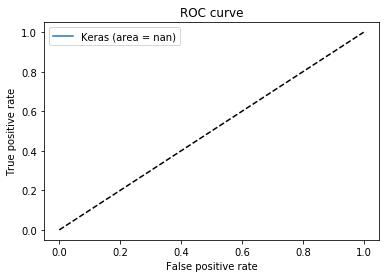

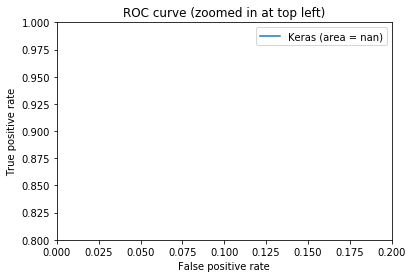

In [238]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()